In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
info_file=pd.read_csv("housing.csv")
info_file.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
info_file.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data=info_file.dropna(subset='total_bedrooms')

In [5]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
X=data[['median_income','housing_median_age','total_bedrooms']].values
y=data['median_house_value'].values

In [7]:
def compute_loss(X,Y,weight,bias):
    prediction=bias + weight * X
    loss=prediction - y.shape
    return np.mean((loss)**2)

In [8]:
def gradient_descent(x_batch,y_batch,weight,bias,learning_rate):
    m=len(x_batch)
    prediction=bias + weight @ x_batch.T
    loss=prediction - y_batch

    weight_gradient=(2/m)*(x_batch.T @ loss)
    bias_gradient = (2/m) *np.sum(loss)

    weight -=weight_gradient*learning_rate
    bias  -= bias_gradient*learning_rate

    return weight,bias

In [31]:
def train_model(X,y,learning_rate=0.001, batch_size=len(X), epochs=1000):
    np.random.seed(42)
    weight = np.random.randn(X.shape[1])*0.001
    bias = np.random.randn()*0.001
    loss_history =[]
    for epoch in range(epochs):
        indices  = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0,len(y),batch_size ):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            weight, bias = gradient_descent(X_batch, y_batch,weight,bias, learning_rate)
        loss = compute_loss(X,y,weight,bias)
        loss_history.append(loss)
    return loss_history

print(len(X))

20433


In [10]:
X=(X -X.mean())/X.std()

In [30]:
full_batch=train_model(X,y,learning_rate=0.01, batch_size=len(X), epochs=1000)
mini_batch=train_model(X,y,learning_rate=0.01, batch_size=32, epochs=1000)
sdg=train_model(X,y,learning_rate=0.001, batch_size=1, epochs=1000)

In [33]:
print(full_batch)

[np.float64(212028829.78666118), np.float64(110437133.69853885), np.float64(95041112.55913289), np.float64(150709239.70753837), np.float64(264521787.67402497), np.float64(425468894.8074506), np.float64(624188601.3103831), np.float64(852739639.5258127), np.float64(1104404439.14198), np.float64(1373518396.5069733), np.float64(1655321969.7321188), np.float64(1945832607.521253), np.float64(2241733908.2358217), np.float64(2540279744.0360475), np.float64(2839211379.5094433), np.float64(3136685870.657015), np.float64(3431214253.3739376), np.float64(3721608224.920319), np.float64(4006934191.061277), np.float64(4286473698.815205), np.float64(4559689402.916556), np.float64(4826195825.641454), np.float64(5085734266.709288), np.float64(5338151304.432557), np.float64(5583380402.770431), np.float64(5821426202.868343), np.float64(6052351133.27279), np.float64(6276264021.374231), np.float64(6493310430.689254), np.float64(6703664485.162849), np.float64(6907521973.4637), np.float64(7105094553.879675), n

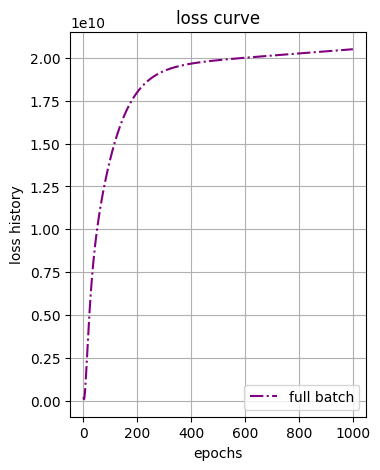

In [32]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,2)
plt.plot(full_batch,label='full batch', color='purple',linestyle='-.')
# plt.plot(mini_batch,label='mini batch', color='black',linestyle ='--')
# plt.plot(sdg,label='SDG',color='skyblue')
plt.xlabel('epochs')
plt.ylabel('loss history')
plt.title('loss curve')
plt.grid(True)
plt.legend()

plt.show()



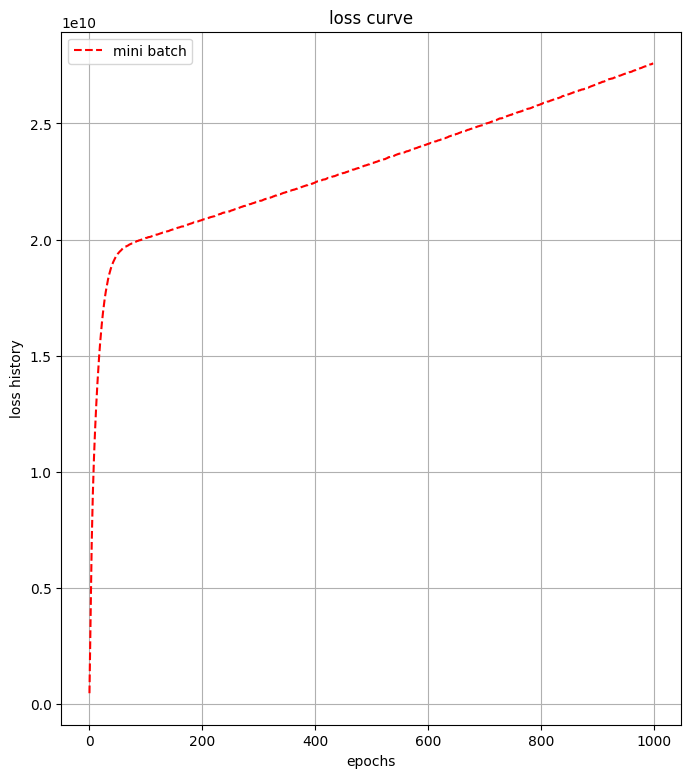

In [28]:

plt.figure(figsize=(8,9))
# plt.plot(full_batch,label='full batch', color='purple',linestyle='-.')
plt.plot(mini_batch,label='mini batch', color='red',linestyle ='--')
# plt.plot(sdg,label='SDG',color='skyblue')
plt.xlabel('epochs')
plt.ylabel('loss history')
plt.title('loss curve')
plt.grid(True)
plt.legend()
plt.show()

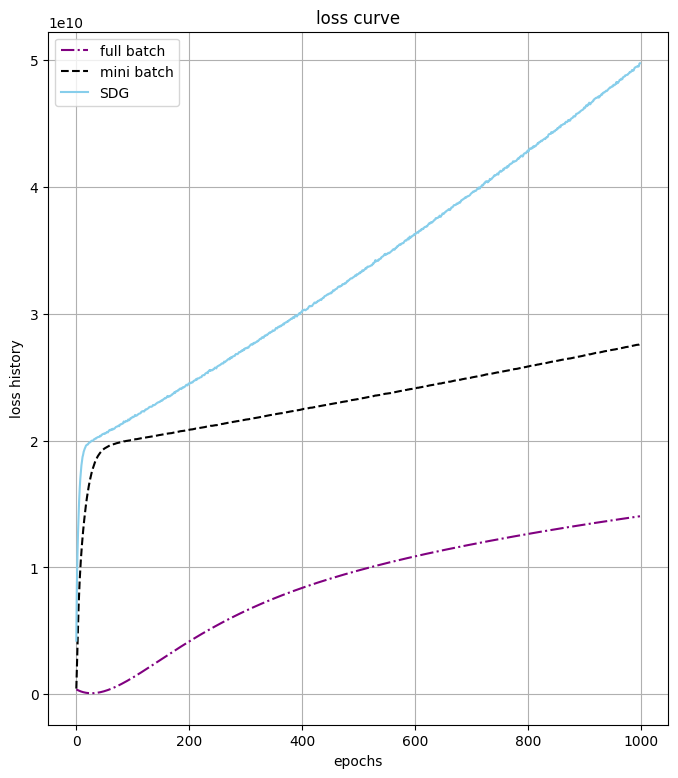

In [29]:

plt.figure(figsize=(8,9))
plt.plot(full_batch,label='full batch', color='purple',linestyle='-.')
plt.plot(mini_batch,label='mini batch', color='black',linestyle ='--')
plt.plot(sdg,label='SDG',color='skyblue')
plt.xlabel('epochs')
plt.ylabel('loss history')
plt.title('loss curve')
plt.grid(True)
plt.legend()


plt.show()

In [36]:
full_batch=train(X,y,batch_size=len(X),epochs=500)
mini_batch=train(X,y,batch_size=200,epochs=500)